In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
__file__ = os.path.abspath('')
dir_path = '/'.join(os.path.realpath(__file__).split('/')[:-1])
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')
# sys.path.append('./backend')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GroupShuffleSplit

import sglm
import sglm_cv
import sglm_pp
import sglm_ez

# Loading in the DesignMatrix (and response) Data

In [6]:
# df = pd.read_csv('../C39_2020_11_03_designMat.csv').drop('Unnamed: 0', axis=1)

# if 'index' in df.columns:
#     df = df.drop('index', axis=1)

# display(df)

# Converting photometry response to a differential rather than raw output

In [7]:
# y_setup_col = 'grnL' # photometry response
# df = sglm_ez.diff_cols(df, ['grnL'])

# # Demonstrative first 5 timesteps of photometry signal vs. differential
# display(df[['grnL', 'grnL_diff']].head())

# # Plotting original photometry output (excluding first timestep)
# plt.figure()
# df['grnL'].iloc[1:].plot(color='c')
# plt.title('Original Photometry Signal vs. Time')
# plt.ylabel('Original Photometry Output')
# plt.xlabel('Timestep Index')

# # Plotting photometry differential output (excluding first timestep)
# plt.figure()
# df['grnL_diff'].iloc[1:].plot(color='g')
# plt.title('Differential Photometry Signal vs. Time')
# plt.ylabel('Differential Photometry Output')
# plt.xlabel('Timestep Index')

# Specifying columns to retain for GLM fitting

In [8]:
# X_cols = [
#     # 'nTrial', # trial ID
#     # 'iBlock', # block number within session
#     # 'CuePenalty', # lick during cue period (no directionality yet, so binary 0,1) # Keep
#     # 'ENLPenalty', # lick during ENL period (no directionality yet, 0,1) # Keep
#     # # 'Select', # binary selection lick
#     # # 'Consumption', # consumption period (from task perspective)
#     # # 'TO', # timeout trial
#     # # 'responseTime', # task state cue to selection window
#     # # 'ENL', # task state ENL window
#     # 'Cue', # task state Cue window # Keep (and all after)
#     # 'decision', # choice lick direction (aligned to select but with directionality -1,1)
#     # 'switch', # switch from previous choice on selection (-1,1)
#     # 'selR', # select reward (-1,1) aligned to selection
#     # 'selHigh', # select higher probability port (-1,1)
#     # 'Reward', # reward vs no reward during consumption period (-1,1)
#     # 'post', # log-odds probability

#     'nTrial',
#     'iBlock',
#     'ENLPenalty',
#     # 'TO',
#     'responseTime',
#     'Cue',
#     'decision',
#     'switch',
#     'selReward',
#     'post',
#     'lickReward',
#     'lickNoReward',
#     'lickLeft',
#     'lickRight',
#     'lickSwitch',
#     'grnR',
#     'grnL'
# ]

# y_col = 'grnL_diff'

In [9]:
# plt.plot(X_setup['post'].iloc[:20000])
# plt.ylim

# Keep only relevant columns specified above

In [10]:
# dfrel = df[X_cols + [y_col]].copy()
# dfrel = dfrel.replace('False', 0).astype(float)
# dfrel = dfrel*1


In [11]:
# dfrel['grnL'].iloc[:].plot()

In [12]:
# dfrel['iBlock'].iloc[:].plot()

# Timeshift all non-response columns forward and backward ts timesteps

In [13]:

# dfrel = sglm_ez.timeshift_cols(dfrel, X_cols[2:], neg_order=-10, pos_order=10)
# X_cols_sftd = sglm_ez.add_timeshifts_to_col_list(X_cols, X_cols[2:], neg_order=-10, pos_order=10)
# # X_setup = sglm_ez.diff_cols(X_setup, ['A', 'B'])
# # X_setup = sglm_ez.setup_autoregression(X_setup, ['B'], 4)

# dfrel = dfrel.dropna()


In [14]:
# X_setup = dfrel[X_cols]
# # X_setup = dfrel[X_cols_sftd]
# y_setup = dfrel[y_col]

# X_setup.head()

In [15]:
# X_setup.iloc[240:600, [9, 4]].plot() # Make this tone one point — make it binned (one and only one point) — use tone duration as binning factor, then make it look like a delta function
# # Data has to be collapsed based on when tone starts

In [16]:
# Sum of values in binning windows

In [17]:
# X_setup.groupby(['nTrial']).count()

In [18]:
# # investigate_X = X_setup[[_ for _ in X_setup.columns if _ not in ['nTrial', 'iBlock', 'TO', 'Select', 'Consumption', 'selHigh']]]
# # (investigate_X.corr()-np.eye(investigate_X.shape[1])).abs().max(axis=1)

# from sklearn.decomposition import PCA
# pca = PCA()
# X_setup_pca = pca.fit_transform(X_setup[[_ for _ in X_setup.columns if _ != 'TO']].iloc[:, 2:])



In [19]:
# %matplotlib inline
# plt.plot(pca.explained_variance_[1:])
# pca.explained_variance_.min()

In [20]:
# pd.DataFrame(X_setup).corr()

In [21]:
# (pd.DataFrame(X_setup).corr() - np.eye(X_setup.shape[1])).abs().max(axis=1)

In [22]:
# pd.DataFrame(X_setup_pca).corr()

In [23]:
# X_setup.describe()

In [24]:
# plt.imshow(X_setup.corr())

In [25]:
# X_setup

In [26]:
# plt.figure(figsize=(10,10))
# plt.plot(X_setup.iloc[:2000, 2:])
# plt.legend(X_setup.columns[2:])

In [27]:
# for col in X_setup.columns:
#     print(f'{col}:', X_setup.query(f'{col} > 0').groupby(['nTrial', col])['post'].count().min())

In [28]:
# sglm_ez.timeshift_cols(X_setup, [_ for _ in X_setup.columns[2:] if _ not in ['Cue', 'Reward', 'post']], neg_order=0, pos_order=100)
# sglm_ez.timeshift_cols_by_signal_length(X_setup, ['Cue', 'Reward', 'post'], neg_order=0, pos_order=1000, shift_amt_ratio=2).iloc[:50]

In [29]:
import pandas as pd



filename = 'dlight_only_WT35_12212020.csv'
# filename = 'dlight_only_WT36_12212020.csv'
# filename = 'Ach_only_WT53L_09032021xlsx.csv'
# filename = 'Ach_only_WT60R_10042021xlsx.csv'

df = pd.read_csv(f'../{filename}')


df = df[[_ for _ in df.columns if 'Unnamed' not in _]]

# .drop('Unnamed: 16', axis=1).drop('Unnamed: 17', axis=1) # .drop('index', axis=1)

print(df.columns)

df = df.rename({'center port occupancy': 'cpo',
                'center port entry': 'cpn',
                'center port exit': 'cpx',

                'left port occupancy': 'lpo',
                'left port entry': 'lpn',
                'left port exit': 'lpx',
                'left licks': 'll',

                'right port occupancy': 'rpo',
                'right port entry': 'rpn',
                'right port exit': 'rpx',
                'right licks': 'rl',

                'no reward': 'nr',
                'reward': 'r',

                'dF/F green (Ach3.0)': 'gdFF',
                'zscored green (Ach3.0)': 'zsgdFF',

                'dF/F green (dLight1.1)': 'gdFF',
                'zscored green (dLight1.1)': 'zsgdFF'
                }, axis=1)

df['event_col_a'] = ((df['cpo'].diff() > 0)*1).replace(0, np.nan) * 1.0
df['event_col_b'] = df['nr'].replace(0, np.nan) * 2.0
df['event_col_c'] = df['r'].replace(0, np.nan) * 3.0

df['event_col'] = df['event_col_a'].combine_first(df['event_col_b']).combine_first(df['event_col_c'])

df = df.drop(['event_col_a', 'event_col_b', 'event_col_c'], axis=1)

df['event_col'] = df['event_col'].bfill()
df['trial_start_flag'] = (df['event_col'] == 1.0)&(df['event_col'].shift(-1) != df['event_col']) * 1.0

df['nTrial'] = df['trial_start_flag'].cumsum().shift(-10).ffill()


Index(['time (msec)', 'center port entry', 'center port occupancy',
       'center port exit', 'left port entry', 'left port occupancy',
       'left port exit', 'left licks', 'right port entry',
       'right port occupancy', 'right port exit', 'right licks', 'no reward',
       'reward', 'dF/F green (dLight1.1)', 'zscored green (dLight1.1)'],
      dtype='object')


In [30]:
df['r'].iloc[4300:4500].sum()

2.0

<AxesSubplot:>

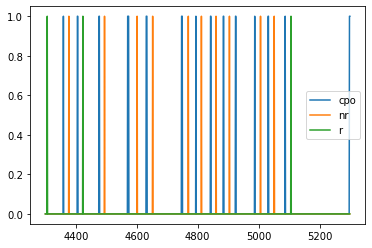

In [31]:
df[['cpo','nr','r']].iloc[4300:5300].plot()

In [32]:
# function [idx, val] = closest_v2(testArr,val)
# tmp=find(testArr<=val);
# idx=tmp(end);
# val=testArr(idx);

df['cpo']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36994    NaN
36995    NaN
36996    NaN
36997    NaN
36998    NaN
Name: cpo, Length: 36999, dtype: float64

In [33]:
import numpy as np

df['event_col_a'] = ((df['cpo'].diff() > 0)*1).replace(0, np.nan) * 1.0
df['event_col_b'] = (df['nr']).replace(0, np.nan) * 2.0
df['event_col_c'] = (df['r']).replace(0, np.nan) * 3.0
df['event_col_d'] = ((df['lpx'] > 0)*1.0).replace(0, np.nan) * 1.0
df['event_col_e'] = ((df['rpx'] > 0)*1.0).replace(0, np.nan) * 1.0

df['event_col_start'] = df['event_col_a'].combine_first(df['event_col_b']).combine_first(df['event_col_c'])

# df = df.drop(['event_col_a', 'event_col_b', 'event_col_c'], axis=1)

df['event_col_start'] = df['event_col_start'].bfill()
df['trial_start_flag'] = ((df['event_col_start'] == 1.0)&(df['event_col_start'].shift(-1) != df['event_col_start']) * 1.0).shift(-5) * 1.0
df['nTrial'] = df['trial_start_flag'].cumsum()

df['event_col_end'] = df['event_col_d'].combine_first(df['event_col_e']).combine_first(df['trial_start_flag'].replace(0.0, np.nan)*2.0)
df['event_col_end'] = df['event_col_end'].ffill()
# df['trial_end_flag'] = ((df['event_col_start'] != 1.0)&(df['event_col_start'].shift(-1) == 1.0)&(df['event_col_start'].shift(-1) != df['event_col_start']) * 1.0).shift(5) * 1.0
df['trial_end_flag'] = ((df['event_col_end'] == 1.0)&(df['event_col_end'].shift(1) == 2.0)&(df['event_col_end'].shift(1) != df['event_col_end'])&(df['nTrial'] > 0) * 1.0).shift(5) * 1.0
df['nEndTrial'] = df['trial_end_flag'].cumsum()


(<AxesSubplot:>, <AxesSubplot:>)

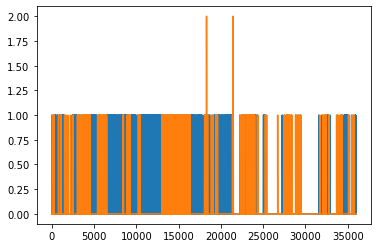

In [34]:
df['lpx'].plot(), df['rpx'].plot()

In [35]:
df

,time (msec),cpn,cpo,cpx,lpn,lpo,lpx,ll,rpn,rpo,...,nTrial,event_col_a,event_col_b,event_col_c,event_col_d,event_col_e,event_col_start,event_col_end,trial_end_flag,nEndTrial
0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36994,1849750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36995,1849800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36996,1849850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36997,1849900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

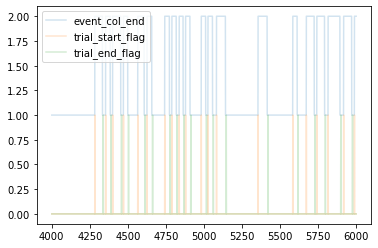

In [36]:
plt.figure(figsize=(10,10))
# plt.plot(df[['event_col_end', 'nTrial', 'nEndTrial', 'trial_start_flag', 'trial_end_flag']].iloc[4000:6000])
# df[['event_col_end', 'nTrial', 'nEndTrial', 'trial_start_flag', 'trial_end_flag']].iloc[4000:6000].plot()
df[['event_col_end', 'trial_start_flag', 'trial_end_flag']].iloc[4000:6000].plot(alpha=0.2)


In [37]:
df['trial_start_flag'] = (df['event_col'] == 1.0)&(df['event_col'].shift(-1) != df['event_col']) * 1.0
df

,time (msec),cpn,cpo,cpx,lpn,lpo,lpx,ll,rpn,rpo,...,nTrial,event_col_a,event_col_b,event_col_c,event_col_d,event_col_e,event_col_start,event_col_end,trial_end_flag,nEndTrial
0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36994,1849750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36995,1849800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36996,1849850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234
36997,1849900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,234


<AxesSubplot:>

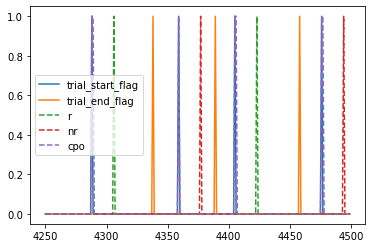

In [38]:
(df.iloc[4250:4500][['trial_start_flag', 'trial_end_flag', 'r', 'nr', 'cpo']] * 1.0).plot(style=['-', '-', '--', '--', '--'])

# Define trial splits based on 500 ms (10 timesteps) prior to the center port occupancy that begins a trial.

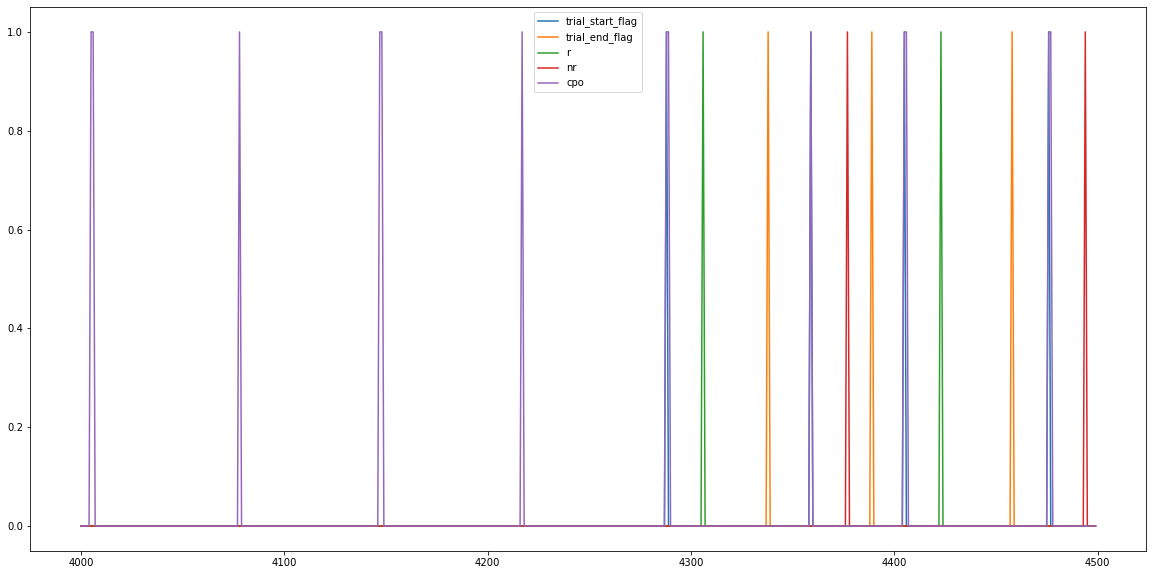

In [39]:
plt.figure(figsize=(20,10))
plt.plot(df.iloc[4000:4500][['trial_start_flag', 'trial_end_flag', 'r', 'nr', 'cpo']] * 1.0)
plt.legend(['trial_start_flag', 'trial_end_flag', 'r', 'nr', 'cpo'])


In [40]:
# df['nTrial'] = df['trial_start_flag'].cumsum().shift(-10).ffill() / 10
# (df[['nTrial', 'cpo', 'nr', 'r']].eval('nTrial = (nTrial % 2)*2')).iloc[-10100:-7500].plot()

<AxesSubplot:>

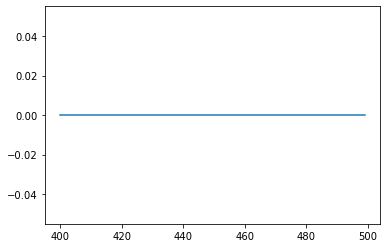

In [41]:
df['rl'].iloc[400:500].plot()

<AxesSubplot:>

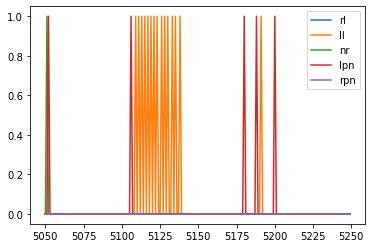

In [42]:
df[['rl','ll','nr','lpn','rpn']].iloc[5050:5250].plot()

<AxesSubplot:>

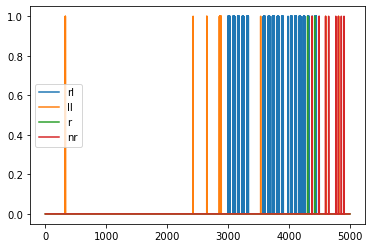

In [43]:
df[['rl','ll','r','nr']].iloc[:5000].plot()


In [44]:
# y_setup_col = 'rdFF' # photometry response
# df = sglm_ez.diff_cols(df, ['rdFF'])

X_cols = [
    'nTrial',
    'nEndTrial',
    #'cpo',
    'cpn', 'cpx',
    #'lpo',
    'lpn', 'lpx',
    'll',
    #'rpo',
    'rpn', 'rpx',
    'rl',
    'nr', 'r'
]

# y_col = 'gdFF'
y_col = 'zsgdFF'
# y_col = 'grnR'

dfrel = df[X_cols + [y_col]].copy()
dfrel = dfrel.replace('False', 0).astype(float)
dfrel = dfrel*1

print(dfrel)
print(X_cols)

neg_order = -20
pos_order = 20


dfrel = sglm_ez.timeshift_cols(dfrel, X_cols[2:], neg_order=neg_order, pos_order=pos_order)

       nTrial  nEndTrial  cpn  cpx  lpn  lpx   ll  rpn  rpx   rl   nr    r  \
0         0.0        NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1         0.0        NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2         0.0        NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3         0.0        NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4         0.0        NaN  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
36994     NaN      234.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
36995     NaN      234.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
36996     NaN      234.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
36997     NaN      234.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
36998     NaN      234.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       zsgdFF  
0         0.0  
1         0.0  
2         0.0  

In [68]:

X_cols_sftd = sglm_ez.add_timeshifts_to_col_list(X_cols, X_cols[2:], neg_order=neg_order, pos_order=pos_order)

print(dfrel.shape)
print(X_cols_sftd)

dfrel = dfrel.dropna()

X_setup = dfrel[X_cols_sftd].copy()
y_setup = dfrel[y_col].copy()

X_setup.head()


(35829, 413)
['nTrial', 'nEndTrial', 'cpn', 'cpx', 'lpn', 'lpx', 'll', 'rpn', 'rpx', 'rl', 'nr', 'r', 'cpn_-20', 'cpx_-20', 'lpn_-20', 'lpx_-20', 'll_-20', 'rpn_-20', 'rpx_-20', 'rl_-20', 'nr_-20', 'r_-20', 'cpn_-19', 'cpx_-19', 'lpn_-19', 'lpx_-19', 'll_-19', 'rpn_-19', 'rpx_-19', 'rl_-19', 'nr_-19', 'r_-19', 'cpn_-18', 'cpx_-18', 'lpn_-18', 'lpx_-18', 'll_-18', 'rpn_-18', 'rpx_-18', 'rl_-18', 'nr_-18', 'r_-18', 'cpn_-17', 'cpx_-17', 'lpn_-17', 'lpx_-17', 'll_-17', 'rpn_-17', 'rpx_-17', 'rl_-17', 'nr_-17', 'r_-17', 'cpn_-16', 'cpx_-16', 'lpn_-16', 'lpx_-16', 'll_-16', 'rpn_-16', 'rpx_-16', 'rl_-16', 'nr_-16', 'r_-16', 'cpn_-15', 'cpx_-15', 'lpn_-15', 'lpx_-15', 'll_-15', 'rpn_-15', 'rpx_-15', 'rl_-15', 'nr_-15', 'r_-15', 'cpn_-14', 'cpx_-14', 'lpn_-14', 'lpx_-14', 'll_-14', 'rpn_-14', 'rpx_-14', 'rl_-14', 'nr_-14', 'r_-14', 'cpn_-13', 'cpx_-13', 'lpn_-13', 'lpx_-13', 'll_-13', 'rpn_-13', 'rpx_-13', 'rl_-13', 'nr_-13', 'r_-13', 'cpn_-12', 'cpx_-12', 'lpn_-12', 'lpx_-12', 'll_-12', 'rpn

,nTrial,nEndTrial,cpn,cpx,lpn,lpx,ll,rpn,rpx,rl,...,cpn_20,cpx_20,lpn_20,lpx_20,ll_20,rpn_20,rpx_20,rl_20,nr_20,r_20
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
holdout = sglm_ez.holdout_split_by_trial_id(X_setup, y_setup, id_cols=['nTrial'], perc_holdout=0.2)

X_tr = X_setup[~holdout]
y_tr = y_setup[~holdout]

X_te = X_setup[holdout]
y_te = y_setup[holdout]

tr_keep = (X_tr['nTrial'] != X_tr['nEndTrial'])
te_keep = (X_te['nTrial'] != X_te['nEndTrial'])

X_tr = X_tr[tr_keep]
y_tr = y_tr[tr_keep]
X_te = X_te[te_keep]
y_te = y_te[te_keep]

best_params = {'max_iter': 1000, 'alpha': 0.001, 'l1_ratio': 0.5, 'fit_intercept': True}
glm = sglm_ez.fit_GLM(X_tr, y_tr, **best_params)

In [62]:

(glm.model.score(X_tr, y_tr),
    glm.model.score(X_te, y_te),
    # glm.model.score(X_tr[tr_keep], y_tr[tr_keep]),
    # glm.model.score(X_te[te_keep], y_te[te_keep])
)

(0.32276901522966384, 0.35154233342681596)

<AxesSubplot:>

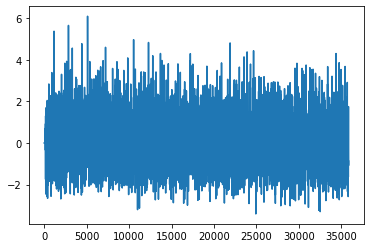

In [55]:
df[y_col].iloc[:].plot()

In [56]:
# # sglm_ez.reconstruct_signal(glm, X_tr.iloc[5000:10000], y_tr.iloc[5000:10000])
# sglm_ez.reconstruct_signal(glm, X_tr, y_tr)
# # plt.plot(X_tr['nTrial'].diff())
# sglm_ez.reconstruct_signal(glm, X_te, y_te)



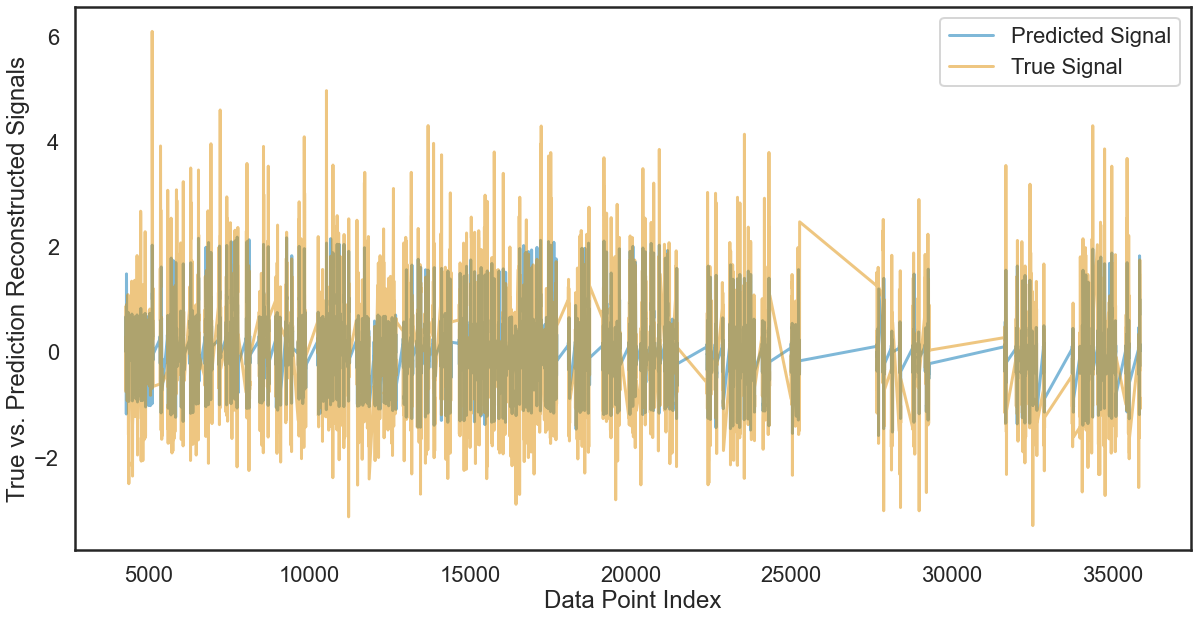

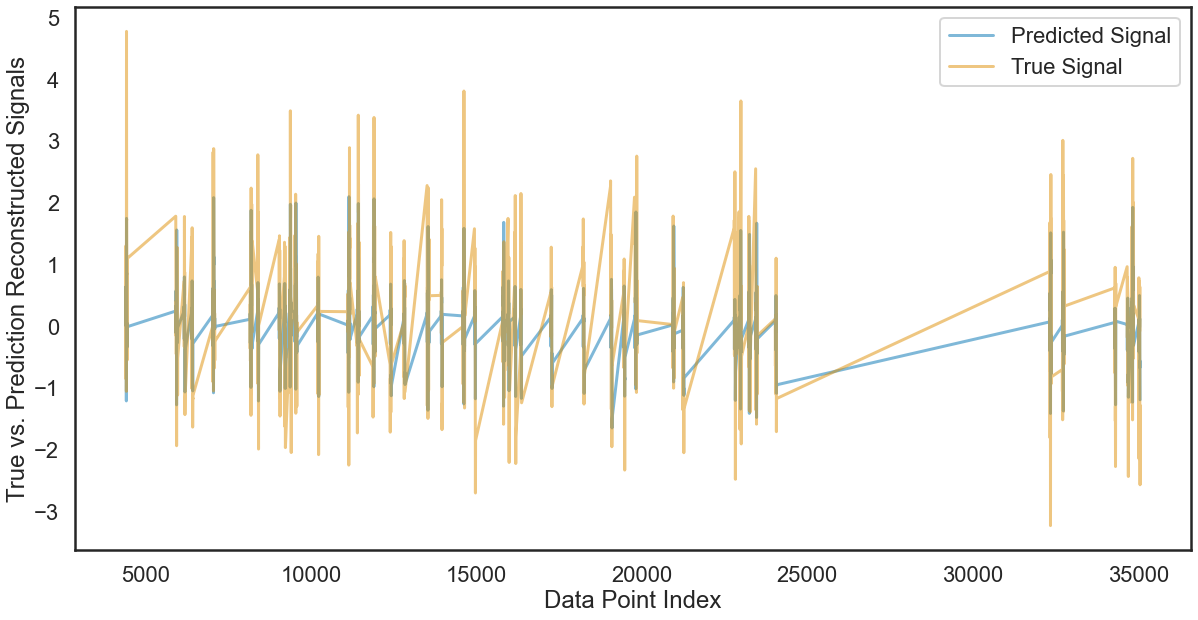

In [58]:
X_tr_nand = X_tr.copy()
# X_tr_nand[~tr_keep] = 0
X_te_nand = X_te.copy()
# X_te_nand[~te_keep] = 0
y_tr_nand = y_tr.copy()
# y_tr_nand[~tr_keep] = glm.intercept_
y_te_nand = y_te.copy()
# y_te_nand[~te_keep] = glm.intercept_


# sglm_ez.reconstruct_signal(glm, X_tr.iloc[5000:10000], y_tr.iloc[5000:10000])
sglm_ez.reconstruct_signal(glm, X_tr_nand, y_tr_nand)
# plt.plot(X_tr['nTrial'].diff())
sglm_ez.reconstruct_signal(glm, X_te_nand, y_te_nand)


(-1.23683608897198, 0.9935967442569309)
0
1
2
3
4
5
6
7
8
9


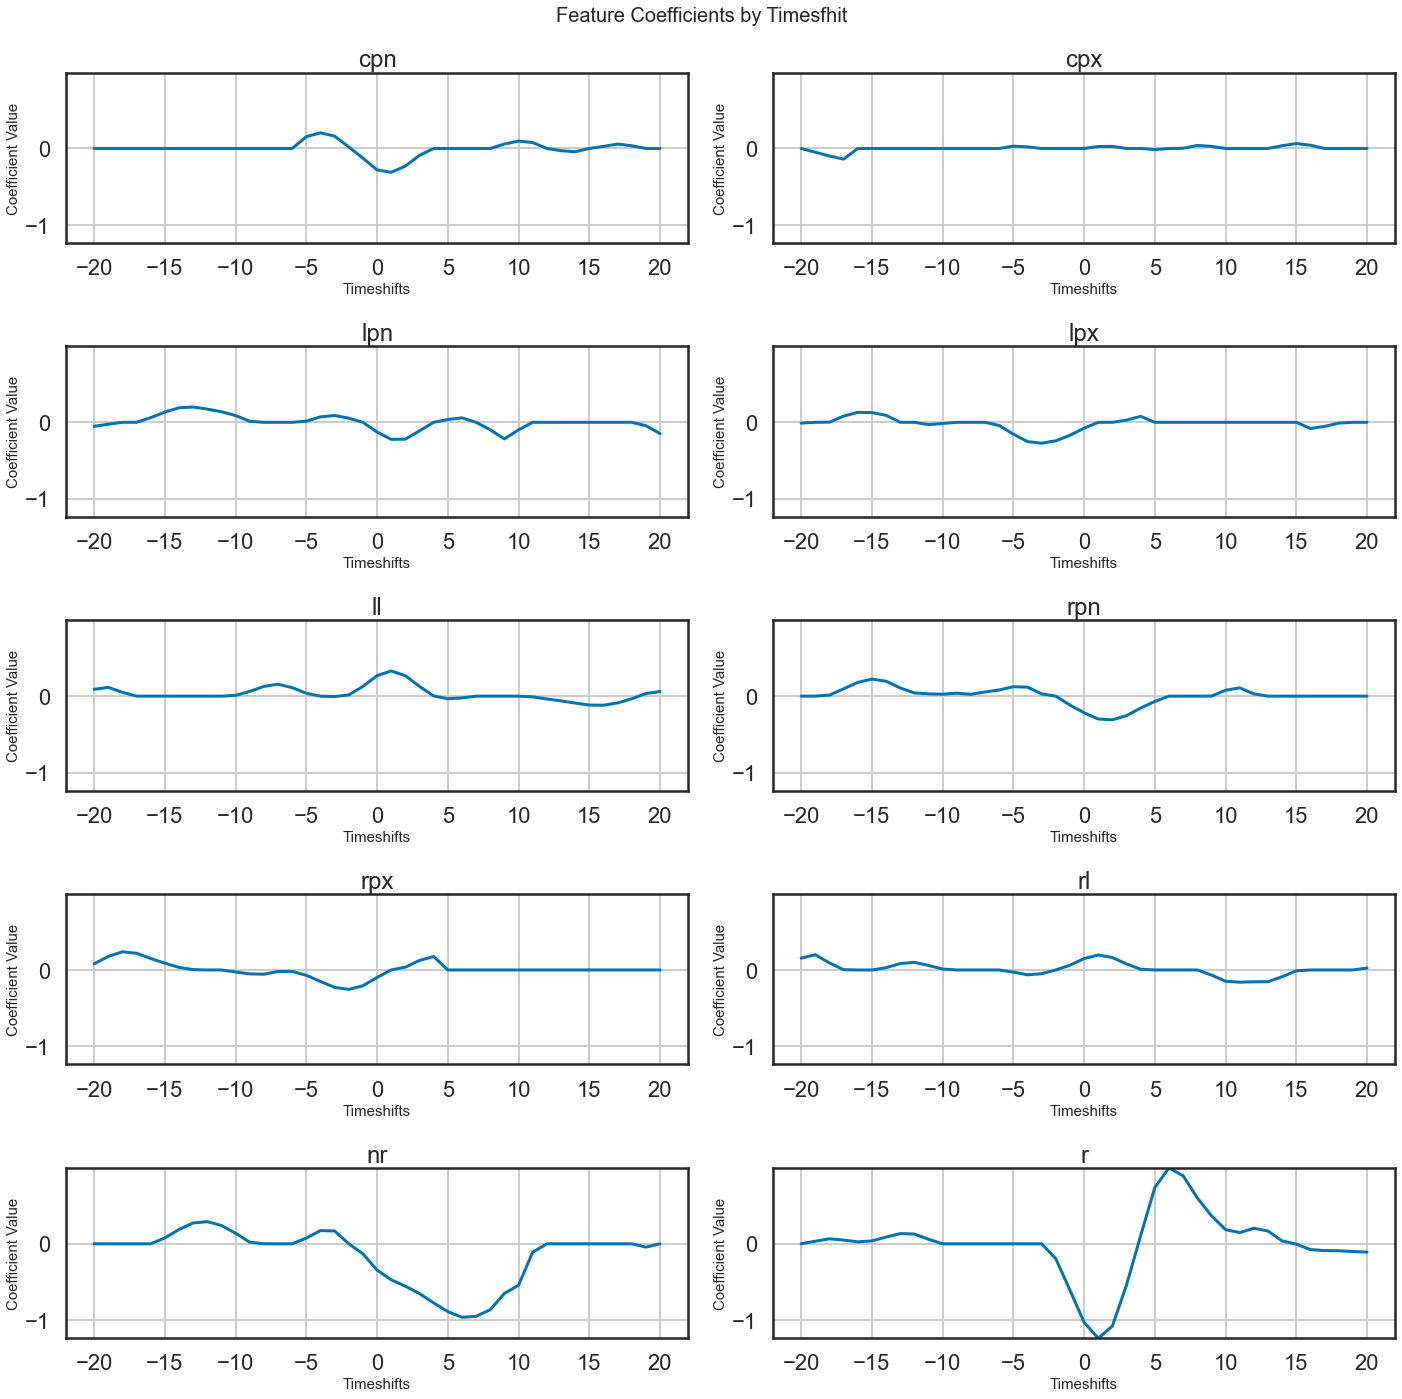

In [65]:
sglm_ez.plot_all_beta_coefs(glm, X_cols, X_cols_sftd, plot_width=2)

(-1.23683608897198, 0.9935967442569309)
0
1
2
3
4
5
6
7
8
9


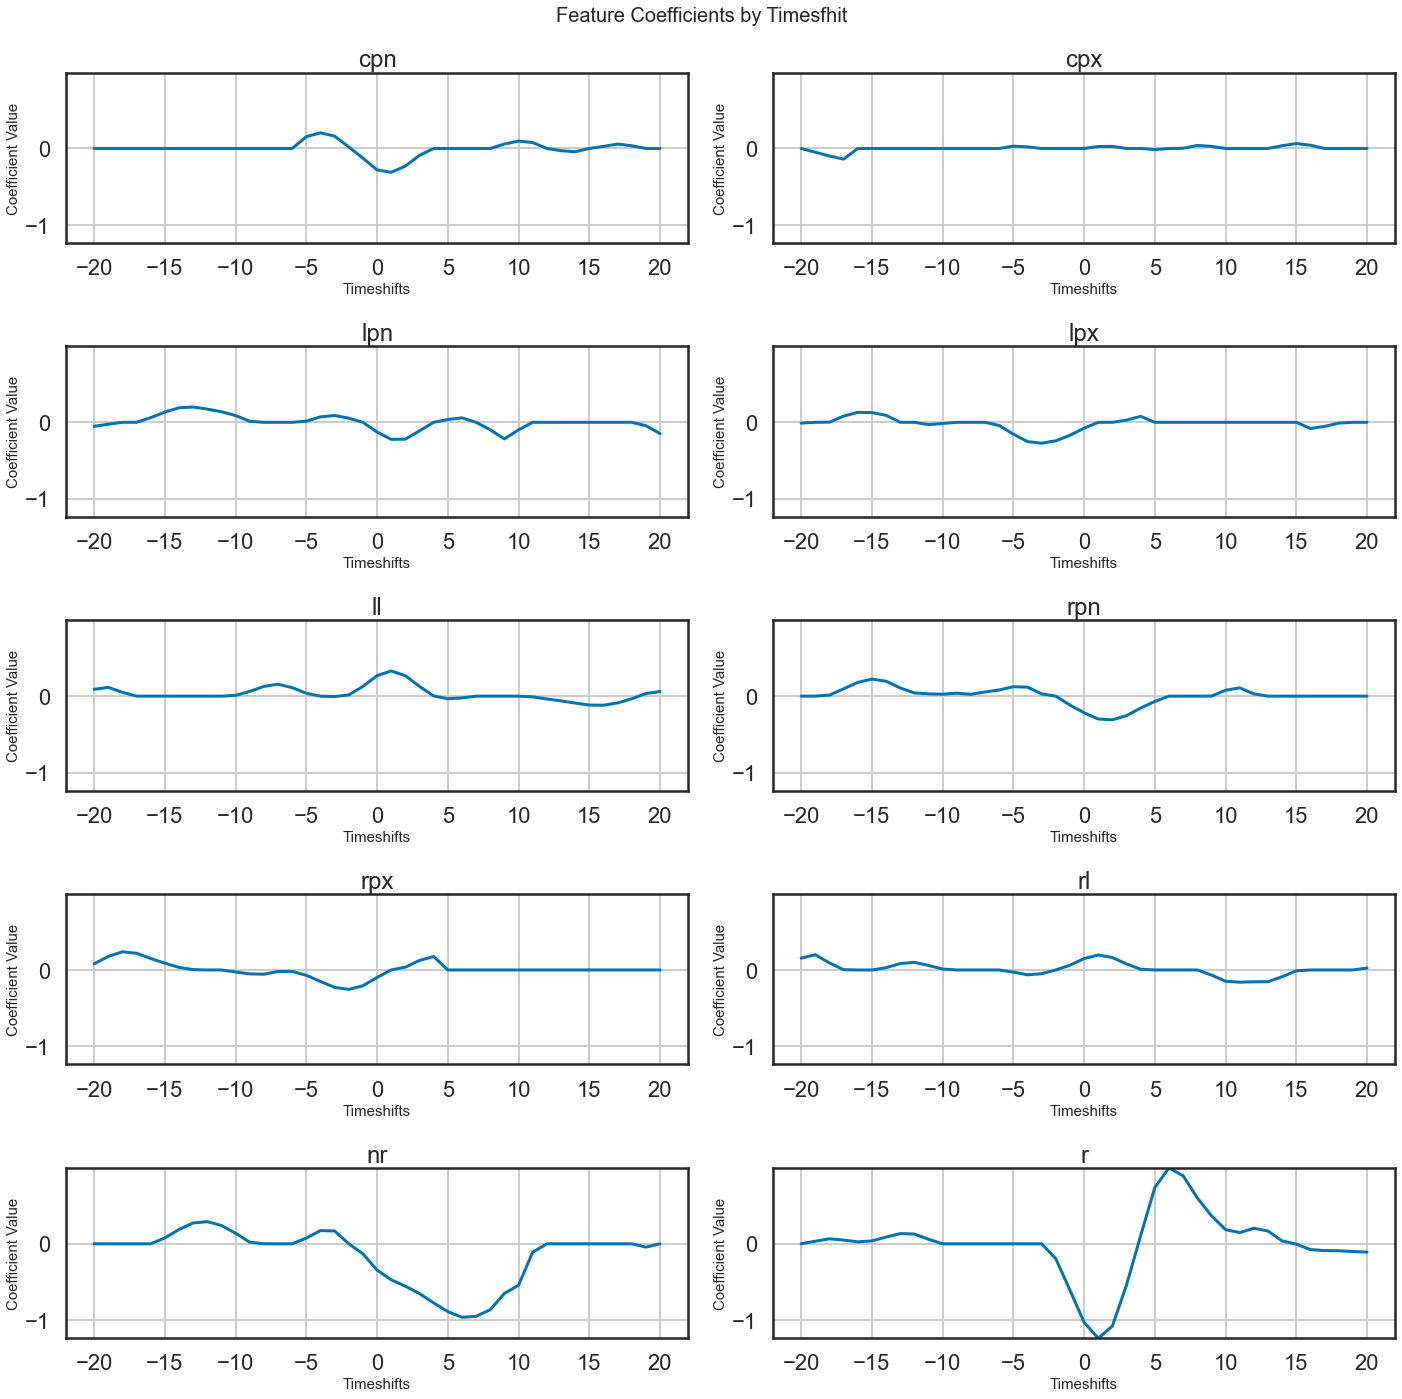

In [67]:
sglm_ez.plot_all_beta_coefs(glm, X_cols, X_cols_sftd, plot_width=2)


In [63]:

# Step 1: Create a dictionary of lists for these relevant keywords...
kwargs_iterations = {
    # 'alpha': reversed([0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]),
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 0.99]
}

# Step 2: Create a dictionary for the fixed keyword arguments that do not require iteration...
kwargs_fixed = {
    'max_iter': 1000,
    'fit_intercept': True
}

score_method = 'r2'

# Step 3: Generate iterable list of keyword sets for possible combinations
glm_kwarg_lst = sglm_cv.generate_mult_params(kwargs_iterations, kwargs_fixed)